# 18.1 핵심 개념
- Apriori Algorithm
- 대용향의 트랜잭션 데이터로부터 'X이면 Y이다.'라는 형식의 연관관계를 발견하는 기법
- 어떤 두 아이템 집합이 빈번히 발생하는가를 알려주는 일련의 규칙들을 생성하는 알고리즘
- 장바구니 분석
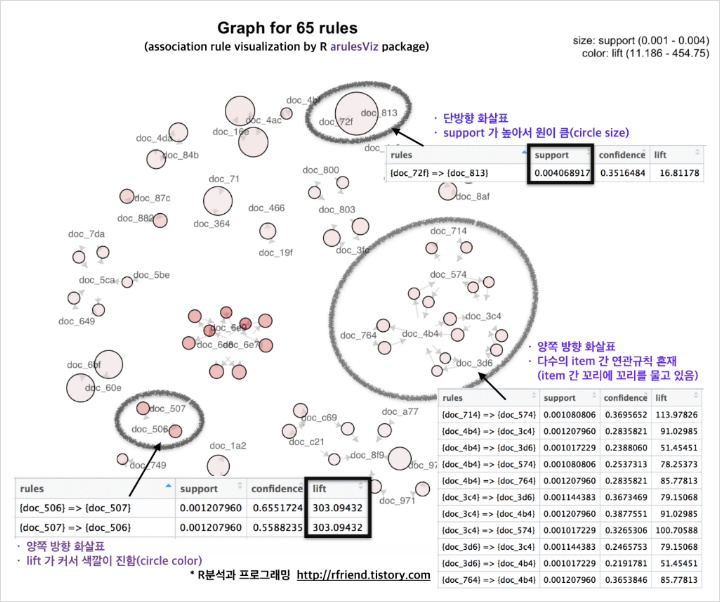

- 지지도
   1. 전체 거래 건수 중에서 항목집합 X와 Y를 모두 포함하는 거래 건수의 비율
   2. P(X∩Y)


- 신뢰도
   1. 항목집합 X를 포함하는 거래 중에서 항목집합 Y도 포함하는 거래 비율
   2. P(Y|X)=P(X∩Y)/P(X)


- 향상도
   1. 항목집합 X가 주어지지 않았을 때의 항목집합 Y의 확률 대비 항목집합 X가 주어졌을 때 항목집합 Y의 확률 증가 비율
   2. 신뢰도/P(Y)=P(X∩Y)/P(X)P(Y)
   3. 1이면 X와 Y는 독립적임

# 18.3 분석 코드

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('../data/Market_Basket.csv', header=None)
data.head()

0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat yogurt  green tea  honey  salad  mineral water  salmon   
1             NaN        NaN    NaN    NaN            NaN     NaN   
2             NaN        NaN    NaN    NaN            NaN     NaN   
3             NaN        NaN    NaN    NaN            NaN     NaN   
4             NaN        NaN    NaN    NaN            NaN     NaN   

                  16               17       18         19  
0  antioxydant juice  frozen smoothie  spinach  olive oil  
1                NaN              NaN      NaN        NaN  
2                NaN              NaN      NaN        NaN  
3                NaN              NaN      NaN        NaN  
4                NaN              NaN      NaN        NaN

In [3]:
# transaction data로 변환
transactions = []
for i in range(data.shape[0]):
    transactions.append([str(data[j][i]) 
                         for j in range(data.shape[1]-data.isnull().sum(axis=1)[i])])

transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [4]:
!pip install apyori
from apyori import apriori

In [5]:
rules=apriori(transactions, min_support=0.015, min_confidence=0.2, min_lift=1, min_length=1)
results=list(rules)
results

[RelationRecord(items=frozenset({'mineral water'}), support=0.23836821757099053, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'mineral water'}), confidence=0.23836821757099053, lift=1.0)]),
 RelationRecord(items=frozenset({'eggs', 'burgers'}), support=0.02879616051193174, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'eggs'}), confidence=0.33027522935779813, lift=1.8378297443715457)]),
 RelationRecord(items=frozenset({'french fries', 'burgers'}), support=0.021997067057725635, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'french fries'}), confidence=0.25229357798165136, lift=1.4761732671141707)]),
 RelationRecord(items=frozenset({'green tea', 'burgers'}), support=0.0174643380882549, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'green tea'}), confidence=0.2003058103975535, lift=1.5161391360161947)]),
 RelationR

In [6]:
# 조건을 만족하는 규칙 : 총 78개
print(len(results))

78


In [7]:
df=pd.DataFrame(results)
df

items   support  \
0                           (mineral water)  0.238368   
1                           (eggs, burgers)  0.028796   
2                   (french fries, burgers)  0.021997   
3                      (green tea, burgers)  0.017464   
4                           (milk, burgers)  0.017864   
..                                      ...       ...   
73                    (spaghetti, tomatoes)  0.020931   
74                      (turkey, spaghetti)  0.016531   
75    (chocolate, spaghetti, mineral water)  0.015865   
76  (mineral water, spaghetti, ground beef)  0.017064   
77         (milk, mineral water, spaghetti)  0.015731   

                                   ordered_statistics  
0   [((), (mineral water), 0.23836821757099053, 1.0)]  
1   [((burgers), (eggs), 0.33027522935779813, 1.83...  
2   [((burgers), (french fries), 0.252293577981651...  
3   [((burgers), (green tea), 0.2003058103975535, ...  
4   [((burgers), (milk), 0.20489296636085627, 1.58...  
..                                                ...  
73  [((tomatoes), (spaghetti), 0.3060428849902534,...  
74  [((turkey), (spaghetti), 0.26439232409381663, ...  
75  [((chocolate, mineral water), (spaghetti), 0.3...  
76  [((mineral water, ground beef), (spaghetti), 0...  
77  [((milk, mineral water), (spaghetti), 0.327777...  

[78 rows x 3 columns]

In [8]:
df.to_csv('../data/apriori_result.csv')
print(df.iloc[6:19][['items','support']])

                             items   support
6             (spaghetti, burgers)  0.021464
7                     (eggs, cake)  0.019064
8             (french fries, cake)  0.017864
9            (mineral water, cake)  0.027463
10               (spaghetti, cake)  0.018131
11        (chicken, mineral water)  0.022797
12            (chicken, spaghetti)  0.017198
13               (eggs, chocolate)  0.033196
14           (escalope, chocolate)  0.017598
15       (french fries, chocolate)  0.034395
16  (chocolate, frozen vegetables)  0.022930
17        (chocolate, ground beef)  0.023064
18               (milk, chocolate)  0.032129


In [9]:
# 연관품목의 시각화
ar=df.iloc[1:74]['items']
ar

1                       (eggs, burgers)
2               (french fries, burgers)
3                  (green tea, burgers)
4                       (milk, burgers)
5              (mineral water, burgers)
                    ...                
69    (mineral water, whole wheat rice)
70               (olive oil, spaghetti)
71                (pancakes, spaghetti)
72                  (shrimp, spaghetti)
73                (spaghetti, tomatoes)
Name: items, Length: 73, dtype: object

In [10]:
df = pd.DataFrame(list(ar), columns=['FROM', 'TO'])

In [11]:
df.head()

FROM       TO
0           eggs  burgers
1   french fries  burgers
2      green tea  burgers
3           milk  burgers
4  mineral water  burgers

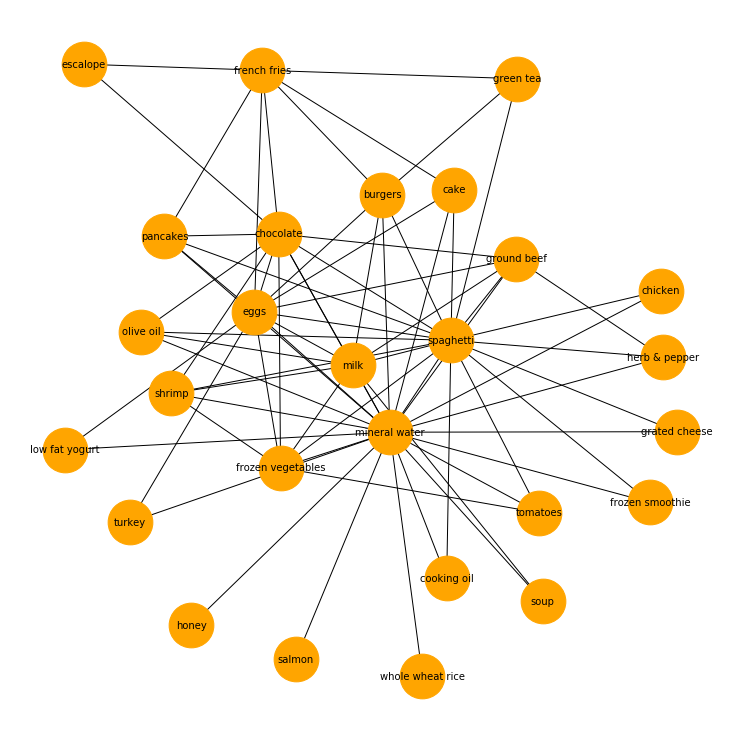

In [13]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

G = nx.from_pandas_edgelist(df, source = 'FROM', target = 'TO')

plt.figure(figsize=(10,10)) 
nx.draw_kamada_kawai(G)
pos=nx.kamada_kawai_layout(G)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
nx.draw_networkx_nodes(G, pos, node_color='orange', node_size=2000, alpha=1)
plt.show()